In [1]:
import numpy as np
import pandas as pd
import magec_utils as mg
import rbo
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
joined = pd.read_csv('time_mimic_magecs.csv')

In [3]:
vitals = ['heartrate_mean', 'sysbp_mean', 'diasbp_mean', 'meanbp_mean',
          'resprate_mean', 'tempc_mean', 'spo2_mean', 'glucose_mean']
labs = ['aniongap', 'albumin', 'bicarbonate', 'bilirubin', 'creatinine', 
        'chloride', 'glucose', 'hemoglobin', 'lactate', 
        'magnesium', 'phosphate', 'platelet', 'potassium', 'ptt', 'inr', 
        'pt', 'sodium', 'bun', 'wbc']  # -hematocrit
comobs = ['congestive_heart_failure', 'chronic_pulmonary', 'pulmonary_circulation']
others = ['age', 'gender']

In [4]:
joined.iloc[[0]]

,case,timepoint,mlp_diasbp_mean,mlp_bilirubin,mlp_tempc_mean,mlp_resprate_mean,mlp_heartrate_mean,mlp_platelet,mlp_potassium,mlp_chloride,mlp_glucose,mlp_pt,mlp_albumin,mlp_sodium,mlp_meanbp_mean,mlp_sysbp_mean,mlp_magnesium,mlp_ptt,mlp_hemoglobin,mlp_aniongap,mlp_inr,mlp_wbc,mlp_bun,mlp_creatinine,mlp_lactate,mlp_phosphate,mlp_glucose_mean,mlp_spo2_mean,mlp_bicarbonate,perturb_diasbp_mean_prob_mlp,perturb_bilirubin_prob_mlp,perturb_tempc_mean_prob_mlp,perturb_resprate_mean_prob_mlp,perturb_heartrate_mean_prob_mlp,perturb_platelet_prob_mlp,perturb_potassium_prob_mlp,perturb_chloride_prob_mlp,perturb_glucose_prob_mlp,perturb_pt_prob_mlp,perturb_albumin_prob_mlp,perturb_sodium_prob_mlp,perturb_meanbp_mean_prob_mlp,perturb_sysbp_mean_prob_mlp,perturb_magnesium_prob_mlp,perturb_ptt_prob_mlp,perturb_hemoglobin_prob_mlp,perturb_aniongap_prob_mlp,perturb_inr_prob_mlp,perturb_wbc_prob_mlp,perturb_bun_prob_mlp,perturb_creatinine_prob_mlp,perturb_lactate_prob_mlp,perturb_phosphate_prob_mlp,perturb_glucose_mean_prob_mlp,perturb_spo2_mean_prob_mlp,perturb_bicarbonate_prob_mlp,orig_prob_mlp,diasbp_mean,bilirubin,tempc_mean,resprate_mean,chronic_pulmonary,heartrate_mean,platelet,potassium,chloride,glucose,pt,albumin,gender,sodium,congestive_heart_failure,meanbp_mean,sysbp_mean,magnesium,ptt,hemoglobin,aniongap,inr,wbc,bun,creatinine,lactate,phosphate,glucose_mean,pulmonary_circulation,age,spo2_mean,bicarbonate,label,rf_diasbp_mean,rf_bilirubin,rf_tempc_mean,rf_resprate_mean,rf_heartrate_mean,rf_platelet,rf_potassium,rf_chloride,rf_glucose,rf_pt,rf_albumin,rf_sodium,rf_meanbp_mean,rf_sysbp_mean,rf_magnesium,rf_ptt,rf_hemoglobin,rf_aniongap,rf_inr,rf_wbc,rf_bun,rf_creatinine,rf_lactate,rf_phosphate,rf_glucose_mean,rf_spo2_mean,rf_bicarbonate,perturb_diasbp_mean_prob_rf,perturb_bilirubin_prob_rf,perturb_tempc_mean_prob_rf,perturb_resprate_mean_prob_rf,perturb_heartrate_mean_prob_rf,perturb_platelet_prob_rf,perturb_potassium_prob_rf,perturb_chloride_prob_rf,perturb_glucose_prob_rf,perturb_pt_prob_rf,perturb_albumin_prob_rf,perturb_sodium_prob_rf,perturb_meanbp_mean_prob_rf,perturb_sysbp_mean_prob_rf,perturb_magnesium_prob_rf,perturb_ptt_prob_rf,perturb_hemoglobin_prob_rf,perturb_aniongap_prob_rf,perturb_inr_prob_rf,perturb_wbc_prob_rf,perturb_bun_prob_rf,perturb_creatinine_prob_rf,perturb_lactate_prob_rf,perturb_phosphate_prob_rf,perturb_glucose_mean_prob_rf,perturb_spo2_mean_prob_rf,perturb_bicarbonate_prob_rf,orig_prob_rf,lr_diasbp_mean,lr_bilirubin,lr_tempc_mean,lr_resprate_mean,lr_heartrate_mean,lr_platelet,lr_potassium,lr_chloride,lr_glucose,lr_pt,lr_albumin,lr_sodium,lr_meanbp_mean,lr_sysbp_mean,lr_magnesium,lr_ptt,lr_hemoglobin,lr_aniongap,lr_inr,lr_wbc,lr_bun,lr_creatinine,lr_lactate,lr_phosphate,lr_glucose_mean,lr_spo2_mean,lr_bicarbonate,perturb_diasbp_mean_prob_lr,perturb_bilirubin_prob_lr,perturb_tempc_mean_prob_lr,perturb_resprate_mean_prob_lr,perturb_heartrate_mean_prob_lr,perturb_platelet_prob_lr,perturb_potassium_prob_lr,perturb_chloride_prob_lr,perturb_glucose_prob_lr,perturb_pt_prob_lr,perturb_albumin_prob_lr,perturb_sodium_prob_lr,perturb_meanbp_mean_prob_lr,perturb_sysbp_mean_prob_lr,perturb_magnesium_prob_lr,perturb_ptt_prob_lr,perturb_hemoglobin_prob_lr,perturb_aniongap_prob_lr,perturb_inr_prob_lr,perturb_wbc_prob_lr,perturb_bun_prob_lr,perturb_creatinine_prob_lr,perturb_lactate_prob_lr,perturb_phosphate_prob_lr,perturb_glucose_mean_prob_lr,perturb_spo2_mean_prob_lr,perturb_bicarbonate_prob_lr,orig_prob_lr,lstm_diasbp_mean,lstm_bilirubin,lstm_tempc_mean,lstm_resprate_mean,lstm_heartrate_mean,lstm_platelet,lstm_potassium,lstm_chloride,lstm_glucose,lstm_pt,lstm_albumin,lstm_sodium,lstm_meanbp_mean,lstm_sysbp_mean,lstm_magnesium,lstm_ptt,lstm_hemoglobin,lstm_aniongap,lstm_inr,lstm_wbc,lstm_bun,lstm_creatinine,lstm_lactate,lstm_phosphate,lstm_glucose_mean,lstm_spo2_mean,lstm_bicarbonate,perturb_diasbp_mean_prob_lstm,perturb_bilirubin_prob_lstm,perturb_tempc_mean_prob_lstm,perturb_resprate_mean_prob_lstm,perturb_heartrate_mean_

In [5]:
feats = vitals+labs
ranks = mg.magec_rank(joined, rank=len(feats), features=feats, models=('mlp', 'rf', 'lr', 'lstm'))

In [6]:
ranks.iloc[[0]]

,case,timepoint,mlp_magec_27,mlp_feat_27,mlp_magec_26,mlp_feat_26,mlp_magec_25,mlp_feat_25,mlp_magec_24,mlp_feat_24,mlp_magec_23,mlp_feat_23,mlp_magec_22,mlp_feat_22,mlp_magec_21,mlp_feat_21,mlp_magec_20,mlp_feat_20,mlp_magec_19,mlp_feat_19,mlp_magec_18,mlp_feat_18,mlp_magec_17,mlp_feat_17,mlp_magec_16,mlp_feat_16,mlp_magec_15,mlp_feat_15,mlp_magec_14,mlp_feat_14,mlp_magec_13,mlp_feat_13,mlp_magec_12,mlp_feat_12,mlp_magec_11,mlp_feat_11,mlp_magec_10,mlp_feat_10,mlp_magec_9,mlp_feat_9,mlp_magec_8,mlp_feat_8,mlp_magec_7,mlp_feat_7,mlp_magec_6,mlp_feat_6,mlp_magec_5,mlp_feat_5,mlp_magec_4,mlp_feat_4,mlp_magec_3,mlp_feat_3,mlp_magec_2,mlp_feat_2,mlp_magec_1,mlp_feat_1,rf_magec_27,rf_feat_27,rf_magec_26,rf_feat_26,rf_magec_25,rf_feat_25,rf_magec_24,rf_feat_24,rf_magec_23,rf_feat_23,rf_magec_22,rf_feat_22,rf_magec_21,rf_feat_21,rf_magec_20,rf_feat_20,rf_magec_19,rf_feat_19,rf_magec_18,rf_feat_18,rf_magec_17,rf_feat_17,rf_magec_16,rf_feat_16,rf_magec_15,rf_feat_15,rf_magec_14,rf_feat_14,rf_magec_13,rf_feat_13,rf_magec_12,rf_feat_12,rf_magec_11,rf_feat_11,rf_magec_10,rf_feat_10,rf_magec_9,rf_feat_9,rf_magec_8,rf_feat_8,rf_magec_7,rf_feat_7,rf_magec_6,rf_feat_6,rf_magec_5,rf_feat_5,rf_magec_4,rf_feat_4,rf_magec_3,rf_feat_3,rf_magec_2,rf_feat_2,rf_magec_1,rf_feat_1,lr_magec_27,lr_feat_27,lr_magec_26,lr_feat_26,lr_magec_25,lr_feat_25,lr_magec_24,lr_feat_24,lr_magec_23,lr_feat_23,lr_magec_22,lr_feat_22,lr_magec_21,lr_feat_21,lr_magec_20,lr_feat_20,lr_magec_19,lr_feat_19,lr_magec_18,lr_feat_18,lr_magec_17,lr_feat_17,lr_magec_16,lr_feat_16,lr_magec_15,lr_feat_15,lr_magec_14,lr_feat_14,lr_magec_13,lr_feat_13,lr_magec_12,lr_feat_12,lr_magec_11,lr_feat_11,lr_magec_10,lr_feat_10,lr_magec_9,lr_feat_9,lr_magec_8,lr_feat_8,lr_magec_7,lr_feat_7,lr_magec_6,lr_feat_6,lr_magec_5,lr_feat_5,lr_magec_4,lr_feat_4,lr_magec_3,lr_feat_3,lr_magec_2,lr_feat_2,lr_magec_1,lr_feat_1,lstm_magec_27,lstm_feat_27,lstm_magec_26,lstm_feat_26,lstm_magec_25,lstm_feat_25,lstm_magec_24,lstm_feat_24,lstm_magec_23,lstm_feat_23,lstm_magec_22,lstm_feat_22,lstm_magec_21,lstm_feat_21,lstm_magec_20,lstm_feat_20,lstm_magec_19,lstm_feat_19,lstm_magec_18,lstm_feat_18,lstm_magec_17,lstm_feat_17,lstm_magec_16,lstm_feat_16,lstm_magec_15,lstm_feat_15,lstm_magec_14,lstm_feat_14,lstm_magec_13,lstm_feat_13,lstm_magec_12,lstm_feat_12,lstm_magec_11,lstm_feat_11,lstm_magec_10,lstm_feat_10,lstm_magec_9,lstm_feat_9,lstm_magec_8,lstm_feat_8,lstm_magec_7,lstm_feat_7,lstm_magec_6,lstm_feat_6,lstm_magec_5,lstm_feat_5,lstm_magec_4,lstm_feat_4,lstm_magec_3,lstm_feat_3,lstm_magec_2,lstm_feat_2,lstm_magec_1,lstm_feat_1,perturb_heartrate_mean_prob_mlp,perturb_heartrate_mean_prob_rf,perturb_heartrate_mean_prob_lr,perturb_heartrate_mean_prob_lstm,perturb_sysbp_mean_prob_mlp,perturb_sysbp_mean_prob_rf,perturb_sysbp_mean_prob_lr,perturb_sysbp_mean_prob_lstm,perturb_diasbp_mean_prob_mlp,perturb_diasbp_mean_prob_rf,perturb_diasbp_mean_prob_lr,perturb_diasbp_mean_prob_lstm,perturb_meanbp_mean_prob_mlp,perturb_meanbp_mean_prob_rf,perturb_meanbp_mean_prob_lr,perturb_meanbp_mean_prob_lstm,perturb_resprate_mean_prob_mlp,perturb_resprate_mean_prob_rf,perturb_resprate_mean_prob_lr,perturb_resprate_mean_prob_lstm,perturb_tempc_mean_prob_mlp,perturb_tempc_mean_prob_rf,perturb_tempc_mean_prob_lr,perturb_tempc_mean_prob_lstm,perturb_spo2_mean_prob_mlp,perturb_spo2_mean_prob_rf,perturb_spo2_mean_prob_lr,perturb_spo2_mean_prob_lstm,perturb_glucose_mean_prob_mlp,perturb_glucose_mean_prob_rf,perturb_glucose_mean_prob_lr,perturb_glucose_mean_prob_lstm,perturb_aniongap_prob_mlp,perturb_aniongap_prob_rf,perturb_aniongap_prob_lr,perturb_aniongap_prob_lstm,perturb_albumin_prob_mlp,perturb_albumin_prob_rf,perturb_albumin_prob_lr,perturb_albumin_prob_lstm,perturb_bicarbonate_prob_mlp,perturb_bicarbonate_prob_rf,perturb_bicarbonate_prob_lr,perturb_bicarbonate_prob_lstm,perturb_bilirubin_prob_mlp,perturb_bilirubin_prob_rf,perturb_bilirubin_prob_lr,perturb_bilirubin_prob_lstm,perturb_creatinine_prob_mlp,perturb_creatinine_prob_rf,per

In [7]:
rbos = mg.magec_rbos(ranks, models=('mlp', 'rf', 'lr', 'lstm'))

In [8]:
rbos.head()

,case,timepoint,mlp_ranked,rf_ranked,lr_ranked,lstm_ranked,rf_mlp,lr_mlp,lr_rf,lstm_mlp,lstm_rf,lstm_lr
0,4,26,"[platelet, pt, hemoglobin, albumin, heartrate_...","[albumin, lactate, pt, chloride, bilirubin, wb...","[heartrate_mean, bun, chloride, potassium, lac...","[potassium, platelet, wbc, lactate, sysbp_mean...",0.254303,0.180136,0.402268,0.212897,0.194127,0.278690
1,4,25,"[albumin, platelet, bun, meanbp_mean, pt, hemo...","[albumin, lactate, bilirubin, pt, platelet, gl...","[heartrate_mean, meanbp_mean, bun, sysbp_mean,...","[albumin, heartrate_mean, wbc, platelet, lacta...",0.480536,0.331478,0.124075,0.467063,0.522134,0.332187
2,4,24,"[albumin, pt, meanbp_mean, platelet, lactate, ...","[albumin, lactate, bilirubin, pt, platelet, he...","[meanbp_mean, bun, sysbp_mean, chloride, heart...","[albumin, wbc, heartrate_mean, lactate, platel...",0.592698,0.287430,0.079008,0.583451,0.572698,0.308715
3,4,23,"[albumin, diasbp_mean, pt, sodium, platelet, m...","[albumin, lactate, pt, bilirubin, inr, platele...","[sysbp_mean, diasbp_mean, bun, chloride, potas...","[albumin, wbc, diasbp_mean, sysbp_mean, bun, l...",0.577072,0.291074,0.115079,0.556408,0.439771,0.503020
4,4,22,"[albumin, glucose_mean, tempc_mean, pt, bun, p...","[albumin, lactate, pt, bilirubin, glucose_mean...","[sysbp_mean, glucose_mean, bun, diasbp_mean, c...","[albumin, glucose_mean, wbc, bun, lactate, pla...",0.621019,0.438686,0.201387,0.728163,0.591037,0.454485


In [11]:
import seaborn as sns

def prepare_heat(rbos, combos, agg='mean'):
    heat = rbos.groupby('timepoint')[combos].agg(agg).reset_index()
    heat = heat.set_index('timepoint').unstack()
    heat = pd.DataFrame(heat).reset_index()
    heat.columns = ['rbo', 'timepoint', 'value']
    heat = heat.pivot(index='rbo', columns='timepoint', values='value')
    return heat

def rbo_heatmap(rbos, ax=None, timepoint=10):
    if ax is None:
        f, ax = plt.subplots(figsize=(11, 7))
    combos = ['rf_mlp', 'lr_mlp', 'lr_rf', 'lstm_mlp', 'lstm_rf', 'lstm_lr']
    rbos = rbos[rbos['timepoint'] <= timepoint]
    heat1 = prepare_heat(rbos, combos, agg='std')
    heat2 = prepare_heat(rbos, combos, agg='mean')
    annot_kws = {"va": 'top'}
    
    ax = sns.heatmap(heat1, cmap=None, annot=True, fmt='.2f', ax=ax, cbar=False)
    
    for t in ax.texts:
        t.set_text('('+t.get_text()+')')
        t.set_color('r')
        trans = t.get_transform()
        offs = matplotlib.transforms.ScaledTranslation(-0, 0.2,
                    matplotlib.transforms.IdentityTransform())
        t.set_transform( offs + trans )
            
    sns.heatmap(heat2, cmap="YlGnBu", annot=True, fmt='.2f', ax=ax)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 45, fontsize = 10)
    ax.invert_xaxis()
    ax.set_title('Average pairwise-model RBO (std in parentheses)')
    return

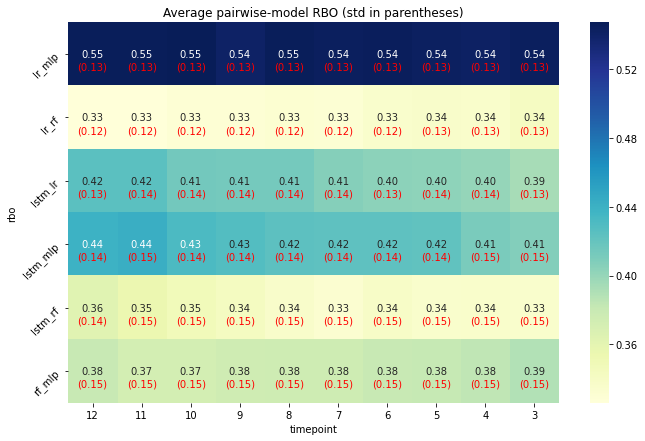

In [12]:
rbo_heatmap(rbos, timepoint=12)